In [120]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
train = pd.read_csv("D:\\Data Science\\linear regression\\Hackathon\\train_v9rqX0R.csv")
test = pd.read_csv("D:\\Data Science\\linear regression\\Hackathon\\test_AbJTz2l.csv")

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
sample_submission = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%206%20Bigmart%20Sales%20prediction/sample_submission_8RXa3c6.csv")

In [10]:
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [11]:
train.shape

(8523, 12)

In [12]:
test.shape

(5681, 11)

In [13]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [18]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
train['source'] = 'train'
test['source'] = 'test'

In [23]:
train.head()
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [26]:
df= pd.concat([train,test])
df.head()
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [31]:
Numerical_columns = df.select_dtypes(include=np.number).drop(columns = ['Item_Outlet_Sales','Outlet_Establishment_Year'])
Numerical_columns

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614
...,...,...,...
5676,10.50,0.013496,141.3154
5677,7.60,0.142991,169.1448
5678,10.00,0.073529,118.7440
5679,15.30,0.000000,214.6218


In [33]:
Categorical_columns = df.select_dtypes(exclude=np.number)
Categorical_columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test


In [34]:
Categorical_columns.apply(lambda x:x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
source                     2
dtype: int64

In [35]:
Categorical_columns.apply(lambda x:print(x.value_counts()))

FDT12    10
FDK56    10
FDR46    10
NCR30    10
DRH03    10
         ..
FDH58     7
FDM52     7
NCW54     7
FDO33     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

In [36]:
df['Item_Identifier'].value_counts()

FDT12    10
FDK56    10
FDR46    10
NCR30    10
DRH03    10
         ..
FDH58     7
FDM52     7
NCW54     7
FDO33     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [37]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [38]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [39]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [40]:
df['Item_Identifier'].value_counts()


FDT12    10
FDK56    10
FDR46    10
NCR30    10
DRH03    10
         ..
FDH58     7
FDM52     7
NCW54     7
FDO33     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [41]:
df.groupby(by = ['Item_Identifier','Item_Type']).count()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
Item_Identifier,Item_Type,,,,,,,,,,,
DRA12,Soft Drinks,8,9,9,9,9,9,6,9,9,6,9
DRA24,Soft Drinks,8,10,10,10,10,10,7,10,10,7,10
DRA59,Soft Drinks,8,10,10,10,10,10,7,10,10,8,10
DRB01,Soft Drinks,6,8,8,8,8,8,7,8,8,3,8
DRB13,Soft Drinks,8,9,9,9,9,9,6,9,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
NCZ30,Household,8,10,10,10,10,10,7,10,10,7,10
NCZ41,Health and Hygiene,7,8,8,8,8,8,6,8,8,5,8
NCZ42,Household,8,10,10,10,10,10,7,10,10,5,10


In [42]:
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x:x[0:2])

In [44]:
print(df['Item_Identifier'],df['Item_Identifier_2'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 14204, dtype: object 0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Identifier_2, Length: 14204, dtype: object


In [45]:
df.groupby(by = ['Item_Identifier_2','Item_Type']).count()

Item_Identifier  Item_Weight  \
Item_Identifier_2 Item_Type                                             
DR                Dairy                              229          191   
                  Hard Drinks                        362          303   
                  Soft Drinks                        726          603   
FD                Baking Goods                      1086          900   
                  Breads                             416          343   
                  Breakfast                          186          152   
                  Canned                            1084          898   
                  Dairy                              907          750   
                  Frozen Foods                      1426         1175   
                  Fruits and Vegetables             2013         1667   
                  Meat                               736          607   
                  Seafood                             89           73   
                  Snack Foods                       1989         1653   
                  Starchy Foods                      269          227   
NC                Health and Hygiene                 858          710   
                  Household                         1548         1285   
                  Others                             280          228   

                                         Item_Fat_Content  Item_Visibility  \
Item_Identifier_2 Item_Type                                                  
DR                Dairy                               229              229   
                  Hard Drinks                         362              362   
                  Soft Drinks                         726              726   
FD                Baking Goods                       1086             1086   
                  Breads                              416              416   
                  Breakfast                           186              186   
                  Canned                             1084             1084   
                  Dairy                               907              907   
                  Frozen Foods                       1426             1426   
                  Fruits and Vegetables              2013             2013   
                  Meat                                736              736   
                  Seafood                              89               89   
                  Snack Foods                        1989             1989   
                  Starchy Foods                       269              269   
NC                Health and Hygiene                  858              858   
                  Household                          1548             1548   
                  Others                              280              280   

                                         Item_MRP  Outlet_Identifier  \
Item_Identifier_2 Item_Type                                            
DR                Dairy                       229                229   
                  Hard Drinks                 362                362   
                  Soft Drinks                 726                726   
FD                Baking Goods               1086               1086   
                  Breads                      416                416   
                  Breakfast                   186                186   
                  Canned                     1084               1084   
                  Dairy                       907                907   
                  Frozen Foods               1426               1426   
                  Fruits and Vegetables      2013               2013   
                  Meat                        736                736   
                  Seafood                      89                 89   
                  Snack Foods                1989               1989   
                  Starchy Foods               269                269   
NC                

In [46]:
df.groupby(by = ['Item_Identifier_2','Item_Type'])['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [47]:
train.groupby(by = ['Outlet_Size','Outlet_Type']).mean()

Item_Weight  Item_Visibility    Item_MRP  \
Outlet_Size Outlet_Type                                                   
High        Supermarket Type1    13.006148         0.059957  141.425982   
Medium      Supermarket Type1    12.917446         0.060806  140.297699   
            Supermarket Type2    12.873346         0.061014  141.678634   
            Supermarket Type3          NaN         0.058615  139.801791   
Small       Grocery Store              NaN         0.108441  139.787088   
            Supermarket Type1    12.848075         0.060864  142.589934   

                               Outlet_Establishment_Year  Item_Outlet_Sales  
Outlet_Size Outlet_Type                                                      
High        Supermarket Type1                     1987.0        2298.995256  
Medium      Supermarket Type1                     1999.0        2348.354635  
            Supermarket Type2                     2009.0        1995.498739  
            Supermarket Type3                     1985.0        3694.038558  
Small       Grocery Store                         1985.0         340.329723  
            Supermarket Type1                     2000.5        2358.343066

In [49]:
train.groupby(by = ['Outlet_Size','Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    2298.995256
Medium       Supermarket Type1    2348.354635
             Supermarket Type2    1995.498739
             Supermarket Type3    3694.038558
Small        Grocery Store         340.329723
             Supermarket Type1    2358.343066
Name: Item_Outlet_Sales, dtype: float64

In [50]:
train.groupby(by = ['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [51]:
train.groupby(by = ['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [52]:
Categorical_columns.isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
source                     0
dtype: int64

In [53]:
Categorical_columns['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [55]:
df.groupby(by = ['Outlet_Size','Outlet_Type']).count()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Outlet_Size Outlet_Type                                                         
High        Supermarket Type1             1553         1553              1553   
Medium      Supermarket Type1             1550         1550              1550   
            Supermarket Type2             1546         1546              1546   
            Supermarket Type3             1559            0              1559   
Small       Grocery Store                  880            0               880   
            Supermarket Type1             3100         3100              3100   

                               Item_Visibility  Item_Type  Item_MRP  \
Outlet_Size Outlet_Type                                               
High        Supermarket Type1             1553       1553      1553   
Medium      Supermarket Type1             1550       1550      1550   
            Supermarket Type2             1546       1546      1546   
            Supermarket Type3             1559       1559      1559   
Small       Grocery Store                  880        880       880   
            Supermarket Type1             3100       3100      3100   

                               Outlet_Identifier  Outlet_Establishment_Year  \
Outlet_Size Outlet_Type                                                       
High        Supermarket Type1               1553                       1553   
Medium      Supermarket Type1               1550                       1550   
            Supermarket Type2               1546                       1546   
            Supermarket Type3               1559                       1559   
Small       Grocery Store                    880                        880   
            Supermarket Type1               3100                       3100   

                               Outlet_Location_Type  Item_Outlet_Sales  \
Outlet_Size Outlet_Type                                                  
High        Supermarket Type1                  1553                932   
Medium      Supermarket Type1                  1550                930   
            Supermarket Type2                  1546                928   
            Supermarket Type3                  1559                935   
Small       Grocery Store                       880                528   
            Supermarket Type1                  3100               1860   

                               source  Item_Identifier_2  
Outlet_Size Outlet_Type                                   
High        Supermarket Type1    1553               1553  
Medium      Supermarket Type1    1550               1550  
            Supermarket Type2    1546               1546  
            Supermarket Type3    1559               1559  
Small       Grocery Store         880                880  
            Supermarket Type1    3100               3100

In [56]:
df.count()

Item_Identifier              14204
Item_Weight                  11765
Item_Fat_Content             14204
Item_Visibility              14204
Item_Type                    14204
Item_MRP                     14204
Outlet_Identifier            14204
Outlet_Establishment_Year    14204
Outlet_Size                  10188
Outlet_Location_Type         14204
Outlet_Type                  14204
Item_Outlet_Sales             8523
source                       14204
Item_Identifier_2            14204
dtype: int64

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC


In [59]:
df.groupby(by = ['Outlet_Type'])['Outlet_Size'].count()

Outlet_Type
Grocery Store         880
Supermarket Type1    6203
Supermarket Type2    1546
Supermarket Type3    1559
Name: Outlet_Size, dtype: int64

In [82]:
df['Outlet_Size'] = df.groupby(by=['Outlet_Type'])['Outlet_Size'].transform(lambda x :x.fillna(x.mode()[0]))

In [83]:
#df.groupby(by=['Outlet_Type'])['Outlet_Size'].transform(lamda x:print(x.mode()[0]))

In [76]:
print(df.groupby(by = ['Outlet_Type'])['Outlet_Size'].transform(lambda x:x.mode()[0]),df.groupby(by = ['Outlet_Type'])['Outlet_Size'].count())


0        Small
1       Medium
2        Small
3        Small
4        Small
         ...  
5676     Small
5677    Medium
5678     Small
5679     Small
5680     Small
Name: Outlet_Size, Length: 14204, dtype: object Outlet_Type
Grocery Store         880
Supermarket Type1    6203
Supermarket Type2    1546
Supermarket Type3    1559
Name: Outlet_Size, dtype: int64


In [79]:
df.groupby(by = ['Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [84]:
df.groupby(by = ['Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small          1805
Supermarket Type1  Small          6191
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [85]:
Numerical_columns.isna().sum()

Item_Weight        2439
Item_Visibility       0
Item_MRP              0
dtype: int64

In [86]:
Numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400


<AxesSubplot:>

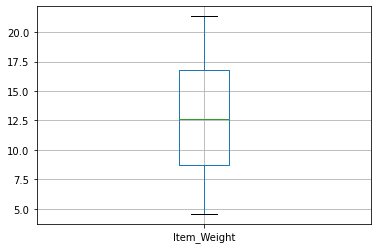

In [87]:
df.boxplot(column='Item_Weight')

In [89]:
df.groupby(by=['Item_Identifier_2']).Item_Weight.mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [91]:
df['Item_Weight'] = df.groupby(by=['Item_Identifier_2']).Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [93]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Identifier_2               0
dtype: int64

In [94]:
df['Item_Visibility'].value_counts()

0.000000    879
0.076792      3
0.077169      3
0.076841      3
0.076975      3
           ... 
0.044503      1
0.030933      1
0.059281      1
0.019228      1
0.031007      1
Name: Item_Visibility, Length: 13006, dtype: int64

<AxesSubplot:>

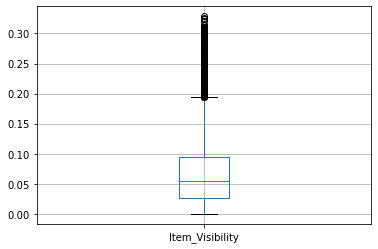

In [96]:
df.boxplot(column ='Item_Visibility')

In [ ]:
#df.loc[df['Item_Visibility']==0.000000,'Item_Visibility'] =

In [99]:
df.loc[df['Item_Visibility']==0.000000,'Item_Visibility']

3       0.0
4       0.0
5       0.0
10      0.0
32      0.0
       ... 
5643    0.0
5648    0.0
5654    0.0
5661    0.0
5679    0.0
Name: Item_Visibility, Length: 879, dtype: float64

In [100]:
df.loc[df['Item_Visibility']==0.000000,'Item_Visibility']=np.nan

In [101]:
df['Item_Visibility'].isna().sum()

879

In [103]:
df['Item_Visibility'].value_counts()

0.076483    3
0.076792    3
0.077011    3
0.076975    3
0.076841    3
           ..
0.044503    1
0.030933    1
0.059281    1
0.019228    1
0.031007    1
Name: Item_Visibility, Length: 13005, dtype: int64

In [106]:
df['Item_Visibility']=df.groupby(by=['Item_Identifier_2']).Item_Visibility.transform(lambda x:x.fillna(x.median()))

In [107]:
df['Item_Visibility'].isna().sum()

0

In [108]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Identifier_2               0
dtype: int64

In [110]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [111]:
train.shape

(8523, 14)

In [112]:
test.shape

(5681, 14)

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Identifier_2          8523 non-null   objec

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Outlet_Sales          0 non-null      float64
 12  source                     5681 non-null   object 
 13  Item_Identifier_2          5681 non-null   objec

<AxesSubplot:>

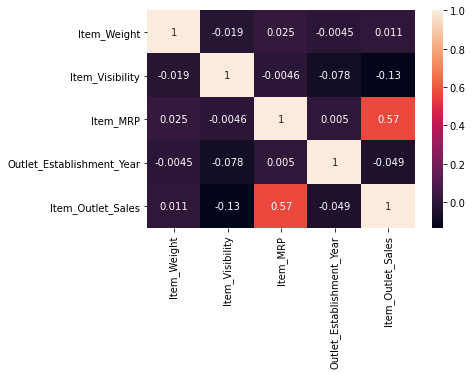

In [116]:
corr_= train.corr()
sns.heatmap(corr_,annot=True)

In [117]:
X= train.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales'])

In [118]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.060793,182.0950,1998
4,8.93,0.048068,53.8614,1987


In [119]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Establishment_Year


In [129]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]

In [122]:
X.values

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, 1.99900000e+03],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, 2.00900000e+03],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, 1.99900000e+03],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, 2.00400000e+03],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, 2.00900000e+03],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, 1.99700000e+03]])

In [125]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [128]:
range(len(X.columns))

range(0, 4)

In [130]:
vif_data

,features,VIF
0,Item_Weight,10.240229
1,Item_Visibility,3.036515
2,Item_MRP,6.130479
3,Outlet_Establishment_Year,17.230260


In [132]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [133]:
df['Out_age'] = 2013 -df['Outlet_Establishment_Year']

In [134]:
df.drop(columns =['Outlet_Establishment_Year'],inplace=True )

In [137]:
df.groupby(by=['Outlet_Size']).Item_Outlet_Sales.mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1867.182814
Name: Item_Outlet_Sales, dtype: float64

In [138]:
df.drop(columns =['Outlet_Size'],inplace=True )

In [139]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [141]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  source                8523 non-null   object 
 11  Item_Identifier_2     8523 non-null   object 
 12  Out_age               8523 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 

In [143]:
train.drop(columns=['source'],inplace=True)
test.drop(columns=['source'],inplace=True)

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Identifier_2     8523 non-null   object 
 11  Out_age               8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


<AxesSubplot:>

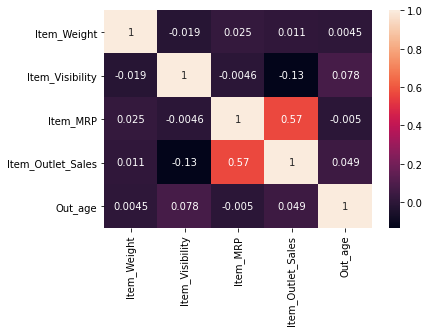

In [146]:
corr_= train.corr()
sns.heatmap(corr_,annot=True)

In [149]:
X= train.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales'])
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif_data


,features,VIF
0,Item_Weight,5.667153
1,Item_Visibility,2.779323
2,Item_MRP,4.653520
3,Out_age,3.693111


In [150]:
df_numbers = df.select_dtypes(include=np.number)
df_categories = df.select_dtypes(exclude=np.number).drop(columns = ['Outlet_Identifier','Item_Identifier','source'])

In [151]:
df_categories

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Identifier_2
0,Low Fat,Dairy,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,FD
4,Low Fat,Household,Tier 3,Supermarket Type1,NC
...,...,...,...,...,...
5676,Regular,Snack Foods,Tier 1,Supermarket Type1,FD
5677,Regular,Starchy Foods,Tier 3,Supermarket Type2,FD
5678,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1,NC
5679,Regular,Canned,Tier 2,Supermarket Type1,FD


In [153]:
df_categories_encoded = pd.get_dummies(df_categories)
df_categories_encoded

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5678,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [158]:
df_final = pd.concat([df_numbers,df_categories_encoded,df[['Outlet_Identifier','Item_Identifier','source']]],axis=1)

In [157]:
df[['Outlet_Identifier','Item_Identifier']]

,Outlet_Identifier,Item_Identifier
0,OUT049,FDA15
1,OUT018,DRC01
2,OUT049,FDN15
3,OUT010,FDX07
4,OUT013,NCD19
...,...,...
5676,OUT046,FDB58
5677,OUT018,FDD47
5678,OUT045,NCO17
5679,OUT017,FDJ26


In [159]:
df_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Identifier,Item_Identifier,source
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDA15,train
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,0,...,0,0,1,0,1,0,0,OUT018,DRC01,train
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDN15,train
3,19.20,0.060793,182.0950,732.3800,15,0,1,0,0,0,...,1,0,0,0,0,1,0,OUT010,FDX07,train
4,8.93,0.048068,53.8614,994.7052,26,1,0,0,0,0,...,0,1,0,0,0,0,1,OUT013,NCD19,train


In [160]:
df_final.to_excel("Pre_processed_data.xlsx",index=False)